In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
import pickle

In [5]:
df = pd.read_csv(r'insurance.csv')

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


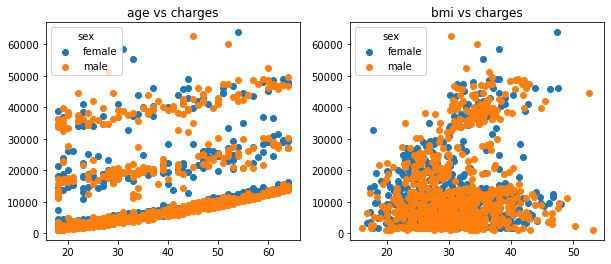

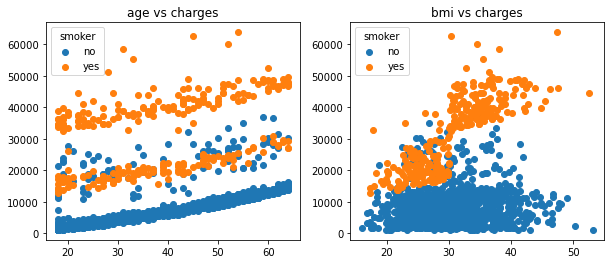

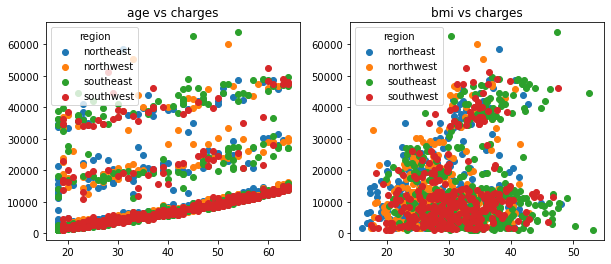

In [7]:
legends = ["sex", "smoker", "region"]
v = 0
for l in [1, 4, 5]:
    x, y = df.iloc[:, [0, 2, -1]].values, df.iloc[:, l].values
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    x_axes = ["age", "bmi"]
    y_axe = "charges"
    v += 1
    for k in range(2):
        for i, j in enumerate(np.unique(y)):
            axes[k].scatter(x[y==j, k], x[y==j, 2])
            axes[k].legend(np.unique(y), title=legends[v-1])
            axes[k].set_title("{} vs {}".format(x_axes[k], y_axe))

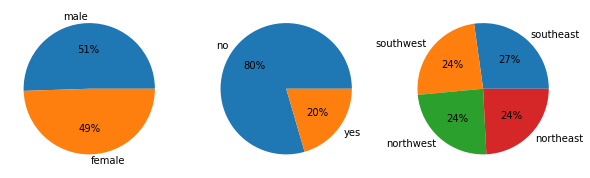

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=len(legends), figsize=(10, 5))
k = 0
for i in legends:
    axes[k].pie(df[i].value_counts(),
               autopct="%1.f%%",
               labels=df[i].value_counts().index)
    k += 1

In [9]:
def encoding(df, category):
    le = LabelEncoder()
    le.fit(df[category])
    df.loc[:, category] = le.fit_transform(df[category])
    return df
#     pickle.dump(le, open("{}.pkl".format(category), "wb"))

In [10]:
for i in legends:
    df = encoding(df, i)

In [11]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [12]:
# df.to_csv("ready_for_nn.csv", index=False)